### <font color='red'>NOTE: Please do not edit this file. </font> Go to <font color='blue'>*File > Save a copy in Drive*</font>.
# **openHPI Course: Knowledge Graphs 2023**

## **Week 3: Querying Knowledge Graphs with SPARQL**
### **Notebook 3.3: SPARQL Query Federation**
---

---



This is the python notebook for week 3 (Querying Knowledge Graphs with SPARQL) in the openHPI Course **Knowledge Graphs 2023**.

In this colab notebook you will learn how to perform federated queries on Linked Stage Graph and the German National Library.

*Please make a copy of this notebook to try out your own adaptions via "File -> Save Copy in Drive"*

## SPARQL Query Federation##
* SPARQL can be used to execute queries distributed over different SPARQL endpoints.
* This extension allows a query author to direct a portion of a query to a particular SPARQL endpoint.
* Results are returned to the federated query processor and are combined with results from the rest of the query.  
* [W3C Recommendation](https://www.w3.org/TR/sparql11-federated-query/)

In [ ]:
!pip install -q sparqlwrapper    #install SPARQLwrapper
!pip install rdflib
!pip install mkwikidata          #package for running SPARQL queries on Wikidata

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 531.9/531.9 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 2.6 MB/s eta 0:00:00


In [ ]:
import mkwikidata, pprint
from rdflib import Graph
from SPARQLWrapper import SPARQLWrapper, JSON, XML
import pandas as pd

## Querying Linked Stage Graph and Wikidata##
logo.svg

Besides DBpedia and Wikidata, there are many interesting and domain specific Knowledge Graphs to explore. In the following example we will explore the Linked Stage Graph Endpoint.
**Linked Stage Graph** contains black and white photographs and metadata about the Stuttgart State Theatre from the 1890s to the 1940s.
The nearly 7.000 photographs give vivid insights into on-stage events like theater plays, operas and ballet performances as well as off-stage moments and theater buildings.

In [ ]:
sparqlslod = SPARQLWrapper("http://slod.fiz-karlsruhe.de/sparql") #determine SPARQL endpoint
sparqlslod.setReturnFormat(JSON) #determine the output format

**Query 1:**  
In Linked Stage Graph, select all resources which list a contributor. For this contributor, retrieve their birth year and place from Wikidata.

The following Wikidata properties are required:
[wdt:P19](https://www.wikidata.org/wiki/Property:P19), [wdt:P569](https://www.wikidata.org/wiki/Property:P569)

In [ ]:
sparqlslod.setQuery("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX schema: <http://schema.org/>
PREFIX slod: <http://slod.fiz-karlsruhe.de/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>


SELECT DISTINCT ?resource ?resourcelabel ?contributor ?contributorlabel ?birthyear ?birthplace
	WHERE {
		?resource schema:contributor ?contributor .
		?resource rdfs:label ?resourcelabel .

		SERVICE <https://query.wikidata.org/sparql> {
			?contributor wdt:P569 ?birthdate .
                        ?contributor wdt:P19 ?birthplace .
      ?contributor rdfs:label ?contributorlabel FILTER (LANG(?contributorlabel) = "en") .
				}
      BIND (YEAR(?birthdate) AS ?birthyear)
		}
Group BY ?birthyear
ORDER BY DESC(?birthyear)
 """
)
results = sparqlslod.query().convert()
results

{'head': {'link': [],
  'vars': ['resource',
   'resourcelabel',
   'contributor',
   'contributorlabel',
   'birthyear',
   'birthplace']},
 'results': {'distinct': False,
  'ordered': True,
  'bindings': [{'resource': {'type': 'uri',
     'value': 'http://slod.fiz-karlsruhe.de/labw-2-2584396'},
    'resourcelabel': {'type': 'literal',
     'value': 'Schwarzer Peter (Norbert Schultze)'},
    'contributor': {'type': 'uri',
     'value': 'http://www.wikidata.org/entity/Q680203'},
    'contributorlabel': {'type': 'literal',
     'xml:lang': 'en',
     'value': 'Norbert Schultze'},
    'birthyear': {'type': 'typed-literal',
     'datatype': 'http://www.w3.org/2001/XMLSchema#integer',
     'value': '1911'},
    'birthplace': {'type': 'uri',
     'value': 'http://www.wikidata.org/entity/Q2773'}},
   {'resource': {'type': 'uri',
     'value': 'http://slod.fiz-karlsruhe.de/labw-2-2584419'},
    'resourcelabel': {'type': 'literal',
     'value': 'Das Zauberbuch von Erzerum (Boris Blacher/Adrie

In [ ]:
results_df = pd.io.json.json_normalize(results['results']['bindings'])
results_df[['resource.value', 'resourcelabel.value', 'contributorlabel.value', 'birthyear.value', 'birthplace.value']]

<ipython-input-6-eef380bcd197>:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  results_df = pd.io.json.json_normalize(results['results']['bindings'])


,resource.value,resourcelabel.value,contributorlabel.value,birthyear.value,birthplace.value
0,http://slod.fiz-karlsruhe.de/labw-2-2584396,Schwarzer Peter (Norbert Schultze),Norbert Schultze,1911,http://www.wikidata.org/entity/Q2773
1,http://slod.fiz-karlsruhe.de/labw-2-2584419,Das Zauberbuch von Erzerum (Boris Blacher/Adri...,Boris Blacher,1903,http://www.wikidata.org/entity/Q75150
2,http://slod.fiz-karlsruhe.de/labw-2-2602575,Das Zauberbuch von Erzerum (Boris Blacher/Adri...,Boris Blacher,1903,http://www.wikidata.org/entity/Q75150
3,http://slod.fiz-karlsruhe.de/labw-2-2606366,Schneider Wibbel (Hans Müller-Schlösser/Mark L...,Mark Lothar,1902,http://www.wikidata.org/entity/Q64
4,http://slod.fiz-karlsruhe.de/labw-2-2584393,Schneider Wibbel (Hans Müller-Schlösser/Mark L...,Mark Lothar,1902,http://www.wikidata.org/entity/Q64
...,...,...,...,...,...
221,http://slod.fiz-karlsruhe.de/labw-2-2579866,Hamlet (William Shakespeare),William Shakespeare,1564,http://www.wikidata.org/entity/Q189288
222,http://slod.fiz-karlsruhe.de/labw-2-2599383,Viel Lärm um nichts (William Shakespeare),William Shakespeare,1564,http://www.wikidata.org/entity/Q189288
223,http://slod.fiz-karlsruhe.de/labw-2-2599390,Was ihr wollt (William Shakespeare),William Shakespeare,1564,http://www.wikidata.org/entity/Q189288
224,http://slod.fiz-karlsruhe.de/labw-2-2606334,"Oedipus, Teile I und II (Sophokles/übers. und ...",Sophocles,-495,http://www.wikidata.org/entity/Q1235930


## Querying GND and Wikidata##
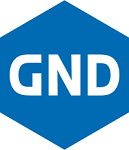  

The Integrated Authority File (**GND** Gemeinsame Normdatei) is a service facilitating the collaborative use and administration of authority data. These authority data represent and describe entities, i.e. persons, corporate bodies, conferences and events, geographic entities, topics and works relating to cultural and academic collections. [See More](https://www.dnb.de/EN/Professionell/Standardisierung/GND/gnd_node.html)

In [ ]:
sparqlgnd = SPARQLWrapper("http://zbw.eu/beta/sparql/gnd/query") #determine SPARQL endpoint
sparqlgnd.setReturnFormat(JSON) #determine the output format

**Query 2:** From GND select all differentiated persons who are female and also select their GND identifier. From Wikidata, take exactly these persons selected from GND and select the movement they belonged to.

The following Wikidata properties are required:
[wdt:P227](https://www.wikidata.org/wiki/Property:P227), [wdt:P135](https://www.wikidata.org/wiki/Property:P135)

In [ ]:
sparqlgnd.setQuery("""
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX :        <https://d-nb.info/gnd/>
PREFIX gndo:    <https://d-nb.info/standards/elementset/gnd#>

SELECT ?gndresource ?wikiresource ?wikiresourceLabel ?movement ?movementLabel

WHERE {
  ?gndresource	a gndo:DifferentiatedPerson .
  ?gndresource gndo:gender <https://d-nb.info/standards/vocab/gnd/gender#female> .
  ?gndresource gndo:gndIdentifier ?gndID .

  SERVICE <https://query.wikidata.org/sparql> {
  ?wikiresource wdt:P227 ?gndID.
  ?wikiresource wdt:P135 ?movement .
  ?wikiresource rdfs:label ?wikiresourceLabel FILTER (lang(?wikiresourceLabel) = "en") .
  ?movement rdfs:label ?movementLabel FILTER (lang(?movementLabel) = "en") .
  }
} LIMIT 50
 """
)
resultsgnd = sparqlgnd.query().convert()

In [ ]:
results_df = pd.io.json.json_normalize(resultsgnd['results']['bindings'])
results_df[['gndresource.value', 'wikiresourceLabel.value', 'movementLabel.value']]

<ipython-input-8-b682c321f7a9>:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  results_df = pd.io.json.json_normalize(resultsgnd['results']['bindings'])


,gndresource.value,wikiresourceLabel.value,movementLabel.value
0,https://d-nb.info/gnd/118679228,Ida Dehmel,feminism
1,https://d-nb.info/gnd/118753754,Sophie Taeuber-Arp,Dada
2,https://d-nb.info/gnd/118760998,Margarethe von Trotta,New German Cinema
3,https://d-nb.info/gnd/118633112,"Wilhelmine of Prussia, Margravine of Brandenbu...",Baroque music
4,https://d-nb.info/gnd/118505173,Jane Austen,literary realism
5,https://d-nb.info/gnd/118507877,Simone de Beauvoir,atheism
6,https://d-nb.info/gnd/118507877,Simone de Beauvoir,feminism
7,https://d-nb.info/gnd/118507877,Simone de Beauvoir,existentialism
8,https://d-nb.info/gnd/118572113,Doris Lessing,literary realism
9,https://d-nb.info/gnd/118808788,Madame d'Aulnoy,Précieuses
